In [1]:
using DrWatson
using DataFrames
using HDF5

In [4]:
datapath = "/Users/mr/2020-10-27"

"/Users/mr/2020-10-27"

In [5]:
records = map(readdir(datapath)) do fname
    prefix, params, suffix = parse_savename(fname)
    params = DataFrame(params)
    params["filename"] = fname
    params
end
df = vcat(records...)
sort!(df, [:duration, :N])

,N,duration,num_responses,filename
,Int64,Int64,Int64,String
1,1,50,500,N=1_duration=50_num_responses=500.hdf5
2,2,50,500,N=2_duration=50_num_responses=500.hdf5
3,3,50,500,N=3_duration=50_num_responses=500.hdf5
4,4,50,500,N=4_duration=50_num_responses=500.hdf5
5,5,50,500,N=5_duration=50_num_responses=500.hdf5
6,6,50,500,N=6_duration=50_num_responses=500.hdf5
7,7,50,500,N=7_duration=50_num_responses=500.hdf5
8,8,50,500,N=8_duration=50_num_responses=500.hdf5
9,9,50,500,N=9_duration=50_num_responses=500.hdf5


In [6]:
me_merged = DataFrame()
ce_merged = DataFrame()
for (duration, group) in pairs(groupby(df, :duration))
    local me = DataFrame()
    local ce = DataFrame()
    for fname in group.filename
        h5open(joinpath(datapath, fname)) do h5f
            dict = DataFrame()
            for obj in h5f["marginal_entropy"]
                dict[name(obj)] = read(obj)
            end
            me = vcat(me, dict; cols=:union)
            
            dict = DataFrame()
            for obj in h5f["conditional_entropy"]
                dict[name(obj)] = read(obj)
            end
            ce = vcat(ce, dict; cols=:union)
        end
    end
    me[:duration] = duration
    ce[:duration] = duration
    me_merged = vcat(me_merged, me; cols=:union)
    ce_merged = vcat(ce_merged, ce; cols=:union)
end

In [7]:
me_merged

,/marginal_entropy/GcTime,/marginal_entropy/Sample,/marginal_entropy/TimeElapsed
,Float64,Float64,Float64
1,0.204504,89.0175,4.81164
2,0.138533,83.0175,2.10579
3,0.133004,71.9641,1.82163
4,0.11128,89.7106,2.23277
5,0.115224,91.5359,2.30755
6,0.141807,85.5942,2.18135
7,0.116549,86.212,2.16373
8,0.117303,78.2535,1.94116
9,0.118691,74.8465,1.88695


In [8]:
save(joinpath(datapath, "me.csv"), me_merged)
save(joinpath(datapath, "ce.csv"), ce_merged)

┌ Info: Precompiling CSVFiles [5d742f6a-9f54-50ce-8119-2520741973ca]
└ @ Base loading.jl:1278


In [14]:
me_merged = DataFrame(load(joinpath(datapath, "me.csv")))

,/marginal_entropy/GcTime,/marginal_entropy/Sample,/marginal_entropy/TimeElapsed
,Float64,Float64,Float64
1,0.204504,89.0175,4.81164
2,0.138533,83.0175,2.10579
3,0.133004,71.9641,1.82163
4,0.11128,89.7106,2.23277
5,0.115224,91.5359,2.30755
6,0.141807,85.5942,2.18135
7,0.116549,86.212,2.16373
8,0.117303,78.2535,1.94116
9,0.118691,74.8465,1.88695


In [38]:
me = combine(groupby(me_merged, :duration), 
    "/marginal_entropy/Sample" => mean => :me, 
    "/marginal_entropy/Sample" => (x->var(x)/length(x)) => :var
)

,duration,me,var
,Int64,Float64,Float64
1,50,86.2409,0.000325926
2,140,237.609,0.00158505
3,230,389.18,0.00343183
4,320,540.565,0.00570723
5,410,692.078,0.00823483
6,500,843.389,0.0109645


In [41]:
ce = combine(groupby(ce_merged, :duration), 
    "/conditional_entropy/Sample" => mean => :ce, 
    "/conditional_entropy/Sample" => (x->var(x)/length(x)) => :var
)

,duration,ce,var
,Int64,Float64,Float64
1,50,85.9939,1.65392e-5
2,140,237.185,7.94591e-5
3,230,388.357,0.000173294
4,320,539.507,0.000286799
5,410,690.688,0.000414095
6,500,841.878,0.000549209


In [40]:
error = sqrt.(me.var + ce.var)

6-element Array{Float64,1}:
 0.018505821814791917
 0.040798343253114135
 0.06004271688200592
 0.07742111093212738
 0.092999594196383
 0.1073021504915552

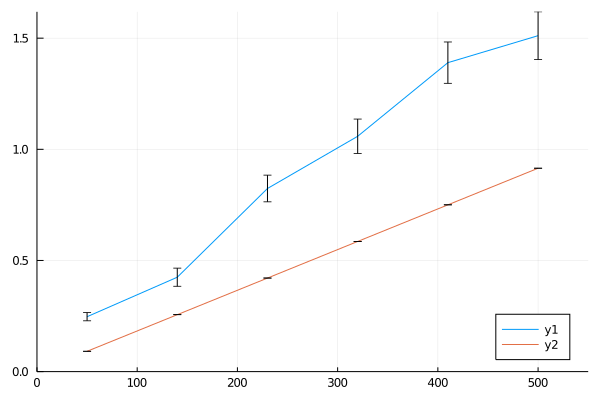

In [43]:
using Plots

p1 = plot(me.duration, [(me.me - ce.ce), 0.00183 .* me.duration], yerr=[error, zeros(size(error))]', ylim=(0, :auto), xlim=(0, 550), legend=:bottomright)

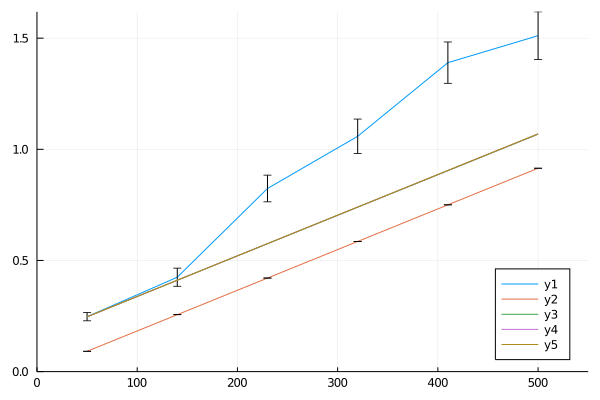

In [75]:
import GaussianMcmc
using LinearAlgebra

function gaussian_mi(N, delta_t)
    t = GaussianMcmc.time_matrix(N, delta_t)
    system = GaussianMcmc.System()
    c_z = GaussianMcmc.corr_z(system, t)
    c_ss = c_z[1:N,1:N]
    c_xx = c_z[N+1:2N,N+1:2N]
    
    0.5 * (logdet(c_ss) + logdet(c_xx) - logdet(c_z))
end

times = 50:50:500
Nmax = 4096
delta_t = times[end] / Nmax

N = map(x->round(Int, x), times ./ delta_t)

mi = gaussian_mi.(N, delta_t)

plot!(p1, times, mi)

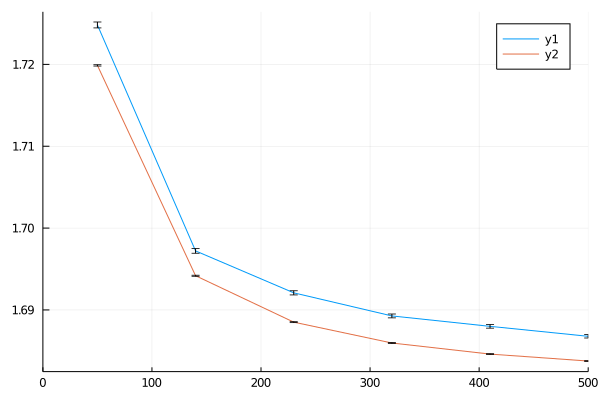

In [44]:
plot(me.duration, [me.me ./ me.duration, ce.ce ./ ce.duration], yerr=[sqrt.(me.var) ./ me.duration, sqrt.(ce.var) ./ ce.duration]', xlim=(0, :auto))

In [52]:
me_groups = map(x->x["/marginal_entropy/Sample"], groupby(me_merged, :duration))

,duration,x1
,Int64,Float64
1,50,89.0175
2,50,83.0175
3,50,71.9641
4,50,89.7106
5,50,91.5359
6,50,85.5942
7,50,86.212
8,50,78.2535
9,50,74.8465


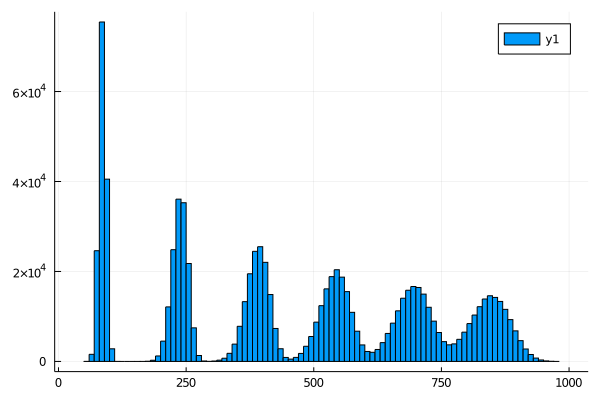

In [46]:
histogram(me_merged["/marginal_entropy/Sample"])

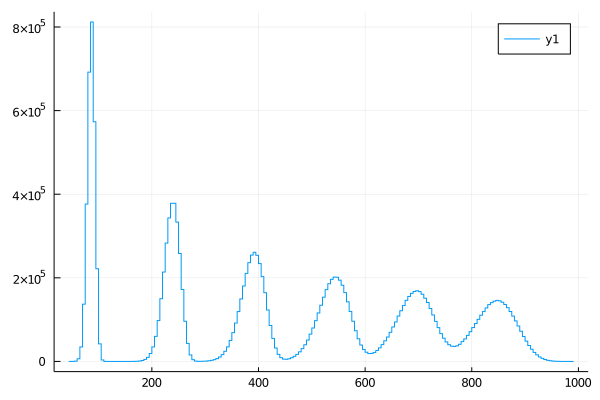

In [47]:
histogram(ce_merged["/conditional_entropy/Sample"])